<a href="https://colab.research.google.com/github/anish170805/Python-prac/blob/main/EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [14]:
df = pd.read_csv('/content/drive/MyDrive/scores_data.csv')

**Top 5 rows of data**

In [15]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


### **DATA CLEANING**

In [16]:
df.isnull().sum()

,0
Batch,0
User_ID,0
Score,0


The data does not contain any null values, we don't need to handle them.

But cleaning does not only include that, we also need to check different data columns , and the issues related to them.

In [18]:
df.columns

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')

There are extra spaces in the column names, need to remove them.

In [20]:
df.columns = df.columns.str.strip()
df.columns

Index(['Batch', 'User_ID', 'Score'], dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


As it can be seen Score is of object dtype because of having values written in the format x/y. We can make it numeric, by changing the expression to include the numerator only.

In [23]:
df['Score'] = df['Score'].str.split('/').str[0].astype(int)
df.head()


,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6
1,AI_ELITE_7,uid_148,6
2,AI_ELITE_7,uid_147,7
3,AI_ELITE_7,uid_146,7
4,AI_ELITE_7,uid_145,4


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Batch    149 non-null    object
 1   User_ID  149 non-null    object
 2   Score    149 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.6+ KB


Now we are done with cleaning

### **Data Visualization**

 **Different stats of `Score`**

count    149.000000
mean       4.382550
std        1.592199
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        7.000000
Name: Score, dtype: float64


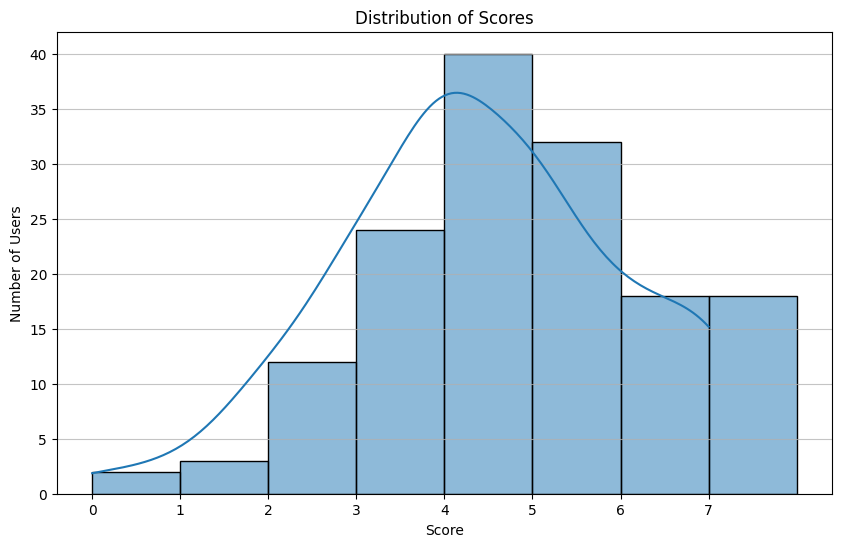

In [26]:
print(df['Score'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], kde=True, bins=range(df['Score'].min(), df['Score'].max() + 2))
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Number of Users')
plt.xticks(range(df['Score'].min(), df['Score'].max() + 1))
plt.grid(axis='y', alpha=0.75)
plt.show()

#### The graph is a normal distribution curve with a hike at `mean=4.38`

**Different stats of `Batches`**

Descriptive Statistics of Scores per Batch:
            count      mean       std  min  25%  50%   75%  max
Batch                                                          
AI_ELITE_4   48.0  3.791667  1.443376  0.0  3.0  4.0  4.25  7.0
AI_ELITE_6   48.0  4.229167  1.640441  0.0  3.0  4.0  5.00  7.0
AI_ELITE_7   53.0  5.056604  1.446682  2.0  4.0  5.0  6.00  7.0


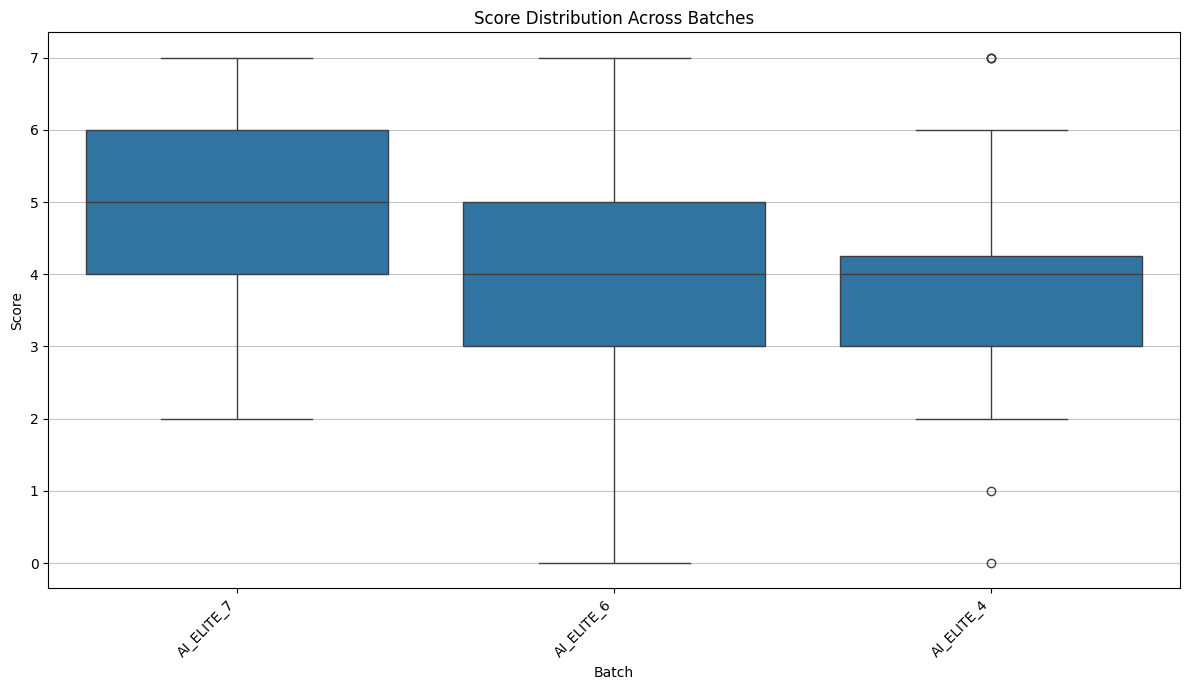

In [27]:
batch_stats = df.groupby('Batch')['Score'].describe()
print('Descriptive Statistics of Scores per Batch:')
print(batch_stats)

plt.figure(figsize=(12, 7))
sns.boxplot(x='Batch', y='Score', data=df)
plt.title('Score Distribution Across Batches')
plt.xlabel('Batch')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

**Final insights-**

**AI_ELITE_7** shows highest mean score , about `5.06`

**AI_ELITE_4** has the loawest mean score, about `3.79`